In [1]:
# Komórka do odpalenia importów i definicji funkcji z instrukcji

"""Function definitions that are used in LSB steganography."""
from matplotlib import pyplot as plt
import numpy as np
import binascii
import cv2 as cv
import math

plt.rcParams["figure.figsize"] = (18, 10)


def encode_as_binary_array(msg):
    """Encode a message as a binary string."""
    msg = msg.encode("utf-8")
    msg = msg.hex()
    msg = [msg[i:i + 2] for i in range(0, len(msg), 2)]
    msg = ["{:08b}".format(int(el, base=16)) for el in msg]
    return "".join(msg)


def decode_from_binary_array(array):
    """Decode a binary string to utf8."""
    array = [array[i:i + 8] for i in range(0, len(array), 8)]
    if len(array[-1]) != 8:
        array[-1] = array[-1] + "0" * (8 - len(array[-1]))
    array = ["{:02x}".format(int(el, 2)) for el in array]
    array = "".join(array)
    result = binascii.unhexlify(array)
    return result.decode("utf-8", errors="replace")


def load_image(path, pad=False):
    """Load an image.
    
    If pad is set then pad an image to multiple of 8 pixels.
    """
    image = cv.imread(path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    if pad:
        y_pad = 8 - (image.shape[0] % 8)
        x_pad = 8 - (image.shape[1] % 8)
        image = np.pad(
            image, ((0, y_pad), (0, x_pad), (0, 0)), mode='constant')
    return image


def save_image(path, image):
    """Save an image."""
    plt.imsave(path, image)


def clamp(n, minn, maxn):
    """Clamp the n value to be in range (minn, maxn)."""
    return max(min(maxn, n), minn)


def hide_message(image, message, nbits=1, spos=0):
    """Hide a message in an image (LSB).
    
    nbits: number of least significant bits
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    if len(message) > len(image) * nbits:
        raise ValueError("Message is to long :(")

    chunks = [message[i:i + nbits] for i in range(0, len(message), nbits)]
    for i, chunk in enumerate(chunks, start=spos):
        byte = "{:08b}".format(image[i])
        new_byte = byte[:-nbits] + chunk
        image[i] = int(new_byte, 2)

    return image.reshape(shape)


def reveal_message(image, nbits=1, length=0, spos=0):
    """Reveal the hidden message.
    
    nbits: number of least significant bits
    length: length of the message in bits.
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    length_in_pixels = math.ceil(length / nbits)
    if len(image) < length_in_pixels or length_in_pixels <= 0:
        length_in_pixels = len(image)

    message = ""
    i = spos
    while i < length_in_pixels:
        byte = "{:08b}".format(image[i])
        message += byte[-nbits:]
        i += 1

    mod = length % -nbits
    if mod != 0:
        message = message[:mod]
    return message


print("Done")

Done


# Zadanie 1

Ukryta wiadomość to: Nikt się nie spodziewał Grappy Ice


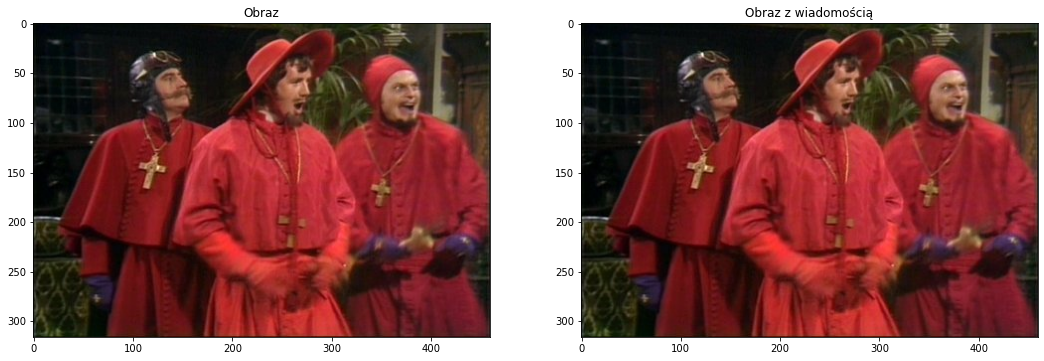

In [2]:
image = load_image("images/spanish.png")
message = "Nikt się nie spodziewał Grappy Ice"
message_binary = encode_as_binary_array(message)
image_with_message = hide_message(image, message_binary)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[0].set_title("Obraz")
ax[1].imshow(image_with_message)
ax[1].set_title("Obraz z wiadomością")

revealed_message = reveal_message(image_with_message, length=len(message_binary))
secret_message = decode_from_binary_array(revealed_message)

print(f"Ukryta wiadomość to: {secret_message}")

# Zadanie 2

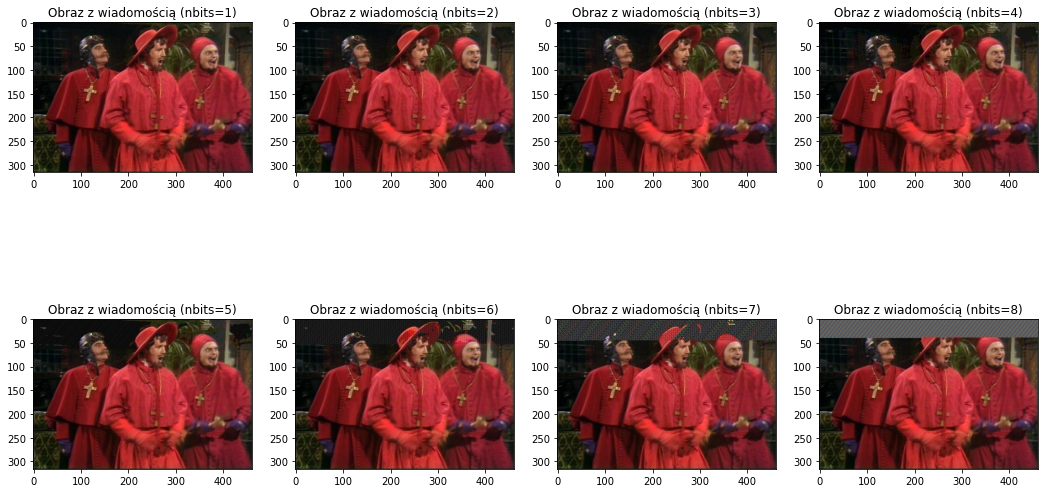

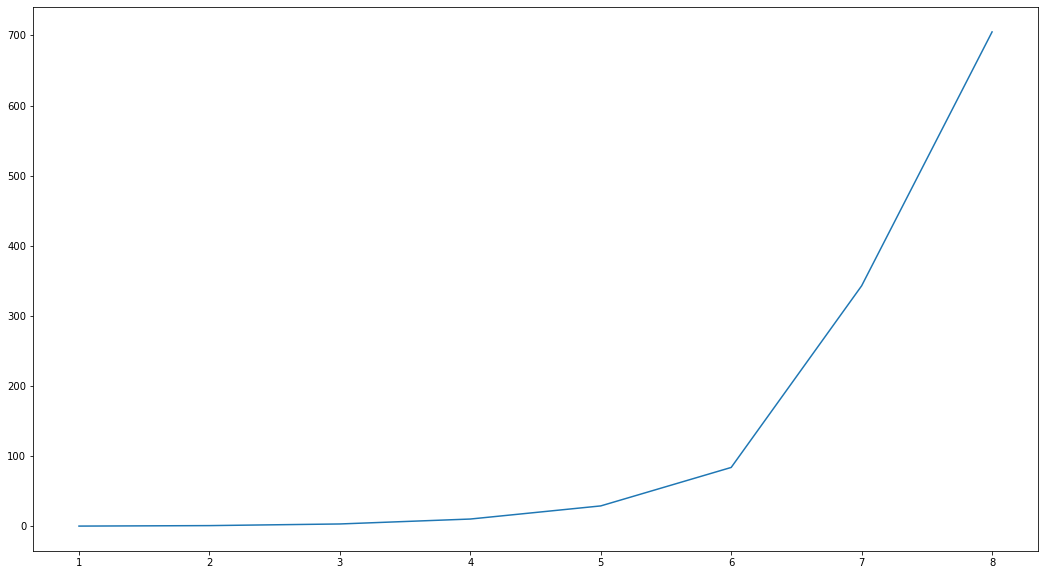

In [3]:
message = "Bardzo lubie grappe grappe grappe grappe " * 1329  # 1329 to max liczba powtorzen
message_binary = encode_as_binary_array(message)

fig, ax = plt.subplots(2, 4)

mse_array = []
for i in range(8):
    image_with_message = hide_message(image, message_binary, i + 1)
    mse = 0
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            for z in range(image.shape[2]):
                base_image_value = int(image[x][y][z])
                message_image_value = int(image_with_message[x][y][z])
                mse += (base_image_value - message_image_value) ** 2
    mse /= image.shape[0] * image.shape[1] * image.shape[2]
    mse_array.append(mse)

    ax[i // 4, i % 4].imshow(image_with_message)
    ax[i // 4, i % 4].set_title(f"Obraz z wiadomością (nbits={i + 1})")

fig = plt.figure()    
plt.plot(range(1, 9), mse_array)

# Zadanie 3

Bardzo lubie grappe grappe grappe grappe Bardzo lubie grappe grappe grappe grappe Bardzo lubie grappe grappe grappe grappe Bardzo lubie grappe grappe grappe grappe Bardzo lubie grappe grappe grappe gr


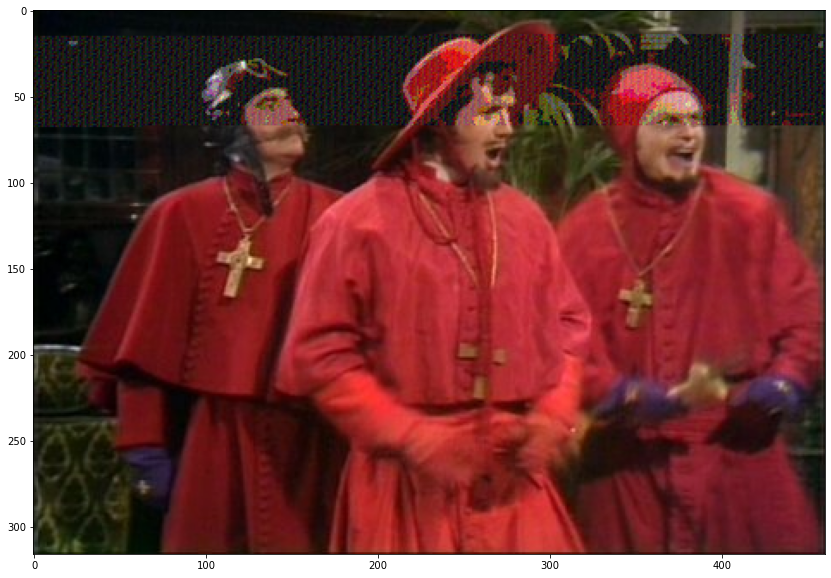

In [4]:
image_with_message = hide_message(image, message_binary, nbits=6, spos=20000)
plt.imshow(image_with_message) # pokazanie ze zapisuje sie przesuniete

revealed_message = reveal_message(image_with_message, nbits=6, length=len(message_binary), spos=20000)
secret_message = decode_from_binary_array(revealed_message)
print(secret_message[:200]) # pokazanie fragmentu wiadomosci

# Zadanie 4

In [5]:
#
# tu umieść kod
#

# Zadanie 5

In [6]:
#
# tu umieść kod
#